# 1. load data

In [5]:
from keras.utils import to_categorical


In [6]:
import joblib as jl

x_data = jl.load('x_data.jl.z')
y_data = jl.load('y_data.jl.z')
print(x_data.shape, y_data.shape)

(12625,) (12625,)


In [7]:
label_to_count = {}
for y in y_data:
    if y not in label_to_count:
        label_to_count[y]=0
    label_to_count[y]+=1
    
print(label_to_count)    

{2: 2302, 3: 2584, 5: 2557, 0: 2606, 4: 2576}


In [10]:
# for test
##x_data2 = x_data[:40000]
##y_data2 = y_data[:40000]

# for true run 
x_data2 = x_data[:]
y_data2 = y_data[:]

label_to_count = {}
for y in y_data2:
    if y not in label_to_count:
        label_to_count[y]=0
    label_to_count[y]+=1
    
print(label_to_count)    


x_data = x_data2
y_data = y_data2

{2: 2302, 3: 2584, 5: 2557, 0: 2606, 4: 2576}


In [ ]:
from keras.utils import to_categorical
import numpy as np
x_data = np.array(x_data, dtype=np.float32)

x_data = x_data/255
y_data = to_categorical(y_data, 6)

# 2. train test split

In [ ]:
from sklearn.model_selection import train_test_split

#x_data = x_data.reshape( (x_data.shape[0],x_data.shape[1]*x_data.shape[2]*x_data.shape[3]) )


x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=666)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

In [ ]:
del x_data

# 3. CNN: LeNet-5

In [ ]:
from keras import layers
from keras import models


model = models.Sequential()
model.add(layers.Conv2D(6, (5,5), activation='tanh', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(6, (5,5), activation='tanh'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(6, (5,5), activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=50, batch_size=512)

# 4. classification_report

In [ ]:
from sklearn.metrics import classification_report


y_pred1 = model.predict(x_test)
y_true = []
y_pred = []
for y in y_pred1:
    y_pred.append(np.argmax(y))

for y in y_test:
    y_true.append(np.argmax(y))

    
print( classification_report (y_true, y_pred, 
                              target_names=['red_blood_cell', 'schizont', 'ring', 'trophozoite', 'gametocyte']

                             ) )

In [12]:
''' PREVIOUS
red_blood_cell       0.99      0.98      0.99     16720
      schizont       0.93      0.94      0.93     15804
          ring       0.91      0.92      0.91     16418
   trophozoite       0.84      0.80      0.82     16176
    gametocyte       0.92      0.97      0.94     16001
     leukocyte       1.00      0.99      0.99     15785

      accuracy                           0.93     96904
     macro avg       0.93      0.93      0.93     96904
  weighted avg       0.93      0.93      0.93     96904
'''

'\nred_blood_cell       0.99      0.98      0.99     16720\n      schizont       0.93      0.94      0.93     15804\n          ring       0.91      0.92      0.91     16418\n   trophozoite       0.84      0.80      0.82     16176\n    gametocyte       0.92      0.97      0.94     16001\n     leukocyte       1.00      0.99      0.99     15785\n\n      accuracy                           0.93     96904\n     macro avg       0.93      0.93      0.93     96904\n  weighted avg       0.93      0.93      0.93     96904\n'

# 5. plot acc

In [13]:
history.history

{'loss': [0.7494551539421082,
  0.5184573531150818,
  0.4265047013759613,
  0.3698621690273285,
  0.33502575755119324,
  0.3139370381832123,
  0.29395169019699097,
  0.2829805016517639,
  0.2737594544887543,
  0.26271045207977295,
  0.25459763407707214,
  0.2480441778898239,
  0.24577657878398895,
  0.2373037040233612,
  0.2385813444852829,
  0.22874686121940613,
  0.22688449919223785,
  0.2239214926958084,
  0.21964243054389954,
  0.2165002077817917,
  0.2157164216041565,
  0.21091793477535248,
  0.2093970626592636,
  0.2058572620153427,
  0.20585563778877258,
  0.20380111038684845,
  0.20236465334892273,
  0.1986486315727234,
  0.1973591297864914,
  0.19601020216941833,
  0.1976885050535202,
  0.1935153603553772,
  0.1940283179283142,
  0.19076134264469147,
  0.18942643702030182,
  0.18764691054821014,
  0.1869579255580902,
  0.18617522716522217,
  0.1831730306148529,
  0.18417854607105255,
  0.18335388600826263,
  0.18423201143741608,
  0.18193848431110382,
  0.1809035837650299,
  0

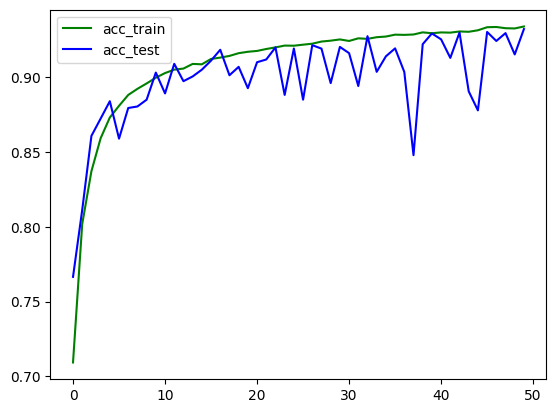

In [14]:
import numpy as np
import matplotlib.pyplot as plt


x = history.epoch
y_acc_train = history.history['accuracy']
y_acc_test = history.history['val_accuracy']

plt.plot(x, y_acc_train, color='g', label='acc_train')
plt.plot(x, y_acc_test, color='b', label='acc_test')
plt.legend(loc='best')


plt.show()

# 6. data re-org

* 各个类别占比均衡的数据集
